In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Warning:
    
The three statements below reinforce the same basic concept:

 - Compute preprocessing statistics ONLY on training data and then APPLY on validation and test data.
 - Never compute preprocessing statistics on test and validation data.
 - USE preprocessing statistics from training data to normalize and center test and validation data.

In [24]:
"""
Notes:
For random samples from N(mu,sigma**2), 
use:
sigma * np.random.randn(...) + mu
"""
#Random number generator
rng = np.random.RandomState(seed=1234)

In [3]:
#N(5,100) distribution
X = 10*rng.randn(100,100)+5

In [4]:
#Mean subtraction step
X -= np.mean(X) 

In [5]:
#Normalization step
X /= np.std(X)

In [6]:
#Generate some data
X = 2.5*rng.randn(1000,1000)+1000
print("X shape: {}".format(X.shape))
X[:5,:5]

X shape: (1000, 1000)


array([[ 1001.85286711,  1000.81680971,  1001.66560269,  1000.15889442,
          999.53886293],
       [  996.91885964,   994.20028495,  1000.16637092,  1003.40061006,
          999.67238206],
       [  998.88856842,  1002.87750634,   999.66134315,  1002.50483183,
          998.98479108],
       [ 1003.61438791,   997.65133093,   999.86868733,   999.48725551,
         1004.86300292],
       [ 1002.60274309,   996.40159279,   999.39732612,   995.48932074,
          998.34251474]])

In [7]:
#Zero centering along features(columns)
X -= np.mean(X,axis=0)

In [8]:
#Covariance matrix computation
cov = np.dot(X.T,X)/X.shape[0]

In [9]:
#Factorize the covariant matrix using SVD

U,S,V  = np.linalg.svd(cov)
print("U shape: {}".format(U.shape))
print("S shape: {}".format(S.shape))
print("V shape: {}".format(V.shape))

U shape: (1000, 1000)
S shape: (1000,)
V shape: (1000, 1000)


In [10]:
#Transfrom(rotate) data using U(left singular vectors) to decorrelate it.
#Data is projected on U subspace
X_rot = np.dot(X,U) 
print("X_rot shape :{}".format(X_rot.shape))
print("Is X_rot.shape == X.shape? : {}".format(X_rot.shape==X.shape))

X_rot shape :(1000, 1000)
Is X_rot.shape == X.shape? : True


In [14]:
#Getting reduced X_rot, taking the first 100 principal components
X_rot_reduced = np.dot(X,U[:,:100])
print("X_rot_reduced shape : {}".format(X_rot_reduced.shape))

X_rot_reduced shape : (1000, 100)


In [15]:
#Whitening
X_white = X_rot/np.sqrt(S + 1e-5)
X_white[0].shape

(1000,)

In [21]:
plot_X_rot_reduced = np.dot(X,U[:,:2])
print("X_rot_reduced shape : {}".format(plot_X_rot_reduced.shape))

X_rot_reduced shape : (1000, 2)


<IPython.core.display.Javascript object>


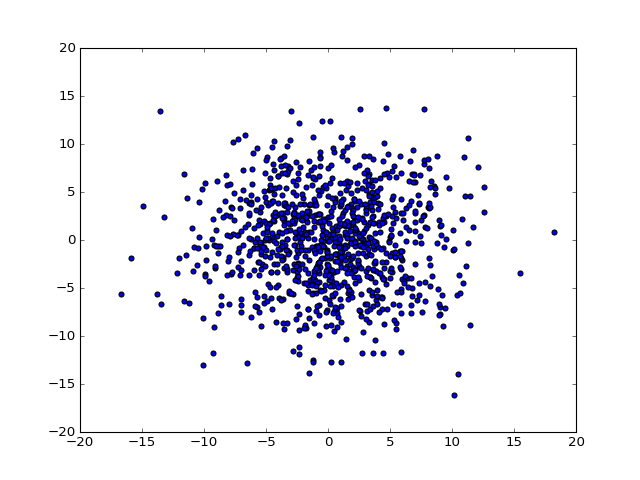

In [22]:
plt.scatter(plot_X_rot_reduced[:,0],plot_X_rot_reduced[:,1])